In [1]:
!pip install msalign

In [7]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
from msalign import msalign


filename = r"/home/jovyan/work/Documents/data_files/msalign_test_data.csv"
data = np.genfromtxt(filename, delimiter=",")
x = data[1:, 0]
array = data[1:, 1:].T
peaks = [3991.4, 4598, 7964, 9160]

aligned = msalign(x, array, peaks, weights=[60, 100, 60, 100], only_shift=False)

In [6]:
data.shape

(15155, 9)

In [5]:
data

array([[ 1.0000000e+00,  2.0000000e+00,  3.0000000e+00, ...,
         7.0000000e+00,  8.0000000e+00,  9.0000000e+00],
       [-7.8600000e-05, -3.6611765e-01, -6.0203922e-01, ...,
        -3.5639216e-01,  4.2011061e+00,  4.1950729e+00],
       [ 2.1800000e-07, -2.8768627e-01, -4.5301961e-01, ...,
        -2.5443137e-01,  4.1608849e+00,  4.1930618e+00],
       ...,
       [ 1.9990235e+04, -1.8131479e-02, -3.6580942e-02, ...,
        -7.4964180e-03,  4.0992124e+00,  4.2040554e+00],
       [ 1.9992874e+04, -1.8585727e-02, -3.6332866e-02, ...,
        -7.3371190e-03,  4.0992124e+00,  4.2040554e+00],
       [ 1.9995513e+04, -1.9040004e-02, -3.6084773e-02, ...,
        -7.1778100e-03,  4.0992124e+00,  4.2040554e+00]])

In [4]:
aligned

array([[ 0.06471721,  0.06466908,  0.06461192, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.45638604,  0.45744489,  0.45872866, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.19081307,  4.19088192,  4.19096609, ...,  4.07803055,
         4.07802886,  4.07802979],
       ...,
       [-0.43607246, -0.43631766, -0.43660756, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.20452189,  4.20426381,  4.20394751, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  4.20405698,
         4.20405485,  4.20405603]])

In [18]:
from scipy.ndimage import shift
from scipy import signal

In [11]:
d = signal.gaussian(20, std=4)
d

array([0.05958732, 0.104579  , 0.17242162, 0.26705184, 0.38855813,
       0.53109599, 0.68194075, 0.82257756, 0.93210249, 0.99221794,
       0.99221794, 0.93210249, 0.82257756, 0.68194075, 0.53109599,
       0.38855813, 0.26705184, 0.17242162, 0.104579  , 0.05958732])

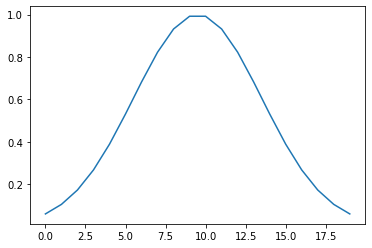

In [12]:
plt.plot(d)

In [27]:
n_signals = 5
n_points = 20
array = np.zeros((n_signals, n_points))
shifts = np.arange(10)
noise = 1e-3

In [28]:
array

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [29]:
gaussian_one = signal.gaussian(n_points, std=4)
gaussian_two = shift(signal.gaussian(n_points, std=4) * 0.5, n_points * 0.2)
gaussian = gaussian_one + gaussian_two

In [30]:
gaussian

array([0.05958732, 0.104579  , 0.17242162, 0.26705184, 0.41835179,
       0.58338549, 0.76815156, 0.95610348, 1.12638156, 1.25776593,
       1.33318831, 1.34339127, 1.28862881, 1.17804972, 1.02720496,
       0.85460937, 0.67834062, 0.513392  , 0.370127  , 0.25386638])

In [34]:
gaussian_two

array([0.        , 0.        , 0.        , 0.        , 0.02979366,
       0.0522895 , 0.08621081, 0.13352592, 0.19427906, 0.265548  ,
       0.34097038, 0.41128878, 0.46605125, 0.49610897, 0.49610897,
       0.46605125, 0.41128878, 0.34097038, 0.265548  , 0.19427906])

In [35]:
gaussian_one

array([0.05958732, 0.104579  , 0.17242162, 0.26705184, 0.38855813,
       0.53109599, 0.68194075, 0.82257756, 0.93210249, 0.99221794,
       0.99221794, 0.93210249, 0.82257756, 0.68194075, 0.53109599,
       0.38855813, 0.26705184, 0.17242162, 0.104579  , 0.05958732])

In [31]:
for i in range(n_signals):
    array[i] = shift(gaussian, shifts[i]) + np.random.normal(0, noise, n_points)

In [37]:
shifts

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
shift(gaussian, shifts[5]) # shifts the current value over one (LHS) and remove right most value

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05958732, 0.104579  , 0.17242162, 0.26705184, 0.41835179,
       0.58338549, 0.76815156, 0.95610348, 1.12638156, 1.25776593,
       1.33318831, 1.34339127, 1.28862881, 1.17804972, 1.02720496])

In [46]:
shift(gaussian, shifts[5])+ np.random.normal(0, noise, n_points)

array([ 1.88199955e-04,  6.98681857e-04,  1.19907460e-03, -5.81737746e-05,
        2.66961120e-03,  5.92026414e-02,  1.03831937e-01,  1.73058845e-01,
        2.68250640e-01,  4.17232074e-01,  5.83326812e-01,  7.69778105e-01,
        9.55542044e-01,  1.12628087e+00,  1.25715454e+00,  1.33224848e+00,
        1.34341510e+00,  1.28707602e+00,  1.17745221e+00,  1.02786888e+00])

In [32]:
array

array([[ 6.04603281e-02,  1.03128236e-01,  1.73833997e-01,
         2.67573156e-01,  4.16958922e-01,  5.84045945e-01,
         7.69074132e-01,  9.55482319e-01,  1.12568248e+00,
         1.25908507e+00,  1.33256136e+00,  1.34374865e+00,
         1.28865182e+00,  1.17694467e+00,  1.02822352e+00,
         8.54794334e-01,  6.79649507e-01,  5.13577325e-01,
         3.71500202e-01,  2.53824499e-01],
       [ 1.00827940e-03,  6.10045741e-02,  1.04761817e-01,
         1.73234719e-01,  2.67205400e-01,  4.17425329e-01,
         5.83406325e-01,  7.66876758e-01,  9.56151779e-01,
         1.12523802e+00,  1.25825417e+00,  1.33305556e+00,
         1.34447473e+00,  1.28795779e+00,  1.17684110e+00,
         1.02702038e+00,  8.52736767e-01,  6.78686388e-01,
         5.13948630e-01,  3.70179529e-01],
       [ 7.51073808e-04, -1.91695041e-03,  5.94947562e-02,
         1.04850733e-01,  1.73244095e-01,  2.66864760e-01,
         4.18539867e-01,  5.84603890e-01,  7.68864610e-01,
         9.55248478e-01,  1.1